<a href="https://colab.research.google.com/github/RaikaAm/INSE6220/blob/main/Room_Occupancy_PyCaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Multiclass Classification with PyCaret**

Multiclass classification is a supervised machine learning technique where the goal is to classify instances into one of three or more classes. (Classifying instances into one of two classes is called Binary Classification).

**Install Pycaret**

In [1]:
# install slim version (default): if you get an error message, run it again
!pip install pycaret==2.3.6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

'2.3.6'

**Import Libraries**

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [4]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.3.5
Seaborn version:  0.11.2


**Dataset**

The examined group comprised kernels belonging to three different varieties of wheat: Kama, Rosa and Canadian, 70 elements each, randomly selected for
the experiment. High quality visualization of the internal kernel structure was detected using a soft X-ray technique. It is non-destructive and considerably cheaper than other more sophisticated imaging techniques like scanning microscopy or laser technology. The images were recorded on 13x18 cm X-ray KODAK plates. Studies were conducted using combine harvested wheat grain originating from experimental fields, explored at the Institute of Agrophysics of the Polish Academy of Sciences in Lublin.

The data set can be used for the tasks of classification and cluster analysis.


Attribute Information:

To construct the data, seven geometric parameters of wheat kernels were measured:
1. area A,
2. perimeter P,
3. compactness C = 4*pi*A/P^2,
4. length of kernel,
5. width of kernel,
6. asymmetry coefficient
7. length of kernel groove.
All of these parameters were real-valued continuous.

https://archive.ics.uci.edu/ml/datasets/seeds

In [5]:
#read cvs file into dataframe
df = pd.read_csv('/content/Occupancy_Estimation5.csv')
df.head(25)

S3_Temp  S4_Temp  S3_Light  S4_Light  S5_CO2  S5_CO2_Slope  class
0     24.56    25.38        53        40     390      0.769231      1
1     24.56    25.44        53        40     390      0.646154      1
2     24.50    25.44        53        40     390      0.519231      1
3     24.56    25.44        53        40     390      0.388462      1
4     24.56    25.44        54        40     390      0.253846      1
5     24.56    25.44        54        40     390      0.165385      1
6     24.56    25.44        54        40     390      0.076923      1
7     24.56    25.44        54        41     390     -0.011538      1
8     24.56    25.50        56        43     390     -0.100000      1
9     24.56    25.50        57        43     390     -0.188462      1
10    24.56    25.44        57        43     390     -0.276923      1
11    24.56    25.50        57        44     390     -0.365385      1
12    24.63    25.50        57        43     390     -0.453846      1
13    24.63    25.56        57        44     390     -0.542308      1
14    24.63    25.56        58        44     390     -0.630769      1
15    24.63    25.56        58        44     390     -0.719231      1
16    24.63    25.56        58        44     395     -0.711538      1
17    24.63    25.56        57        44     395     -0.653846      1
18    24.63    25.56        58        44     395     -0.542308      1
19    24.63    25.50        58        45     395     -0.373077      1
20    24.63    25.50        58        44     390     -0.238462      1
21    24.63    25.56        57        44     395     -0.092308      1
22    24.63    25.56        58        45     395      0.061538      1
23    24.63    25.56        58        45     400      0.319231      1
24    24.63    25.50        59        45     400      0.334615      1

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   S3_Temp       158 non-null    float64
 1   S4_Temp       158 non-null    float64
 2   S3_Light      158 non-null    int64  
 3   S4_Light      158 non-null    int64  
 4   S5_CO2        158 non-null    int64  
 5   S5_CO2_Slope  158 non-null    float64
 6   class         158 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 8.8 KB


In [7]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [8]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


**Exploratory Data Analysis**

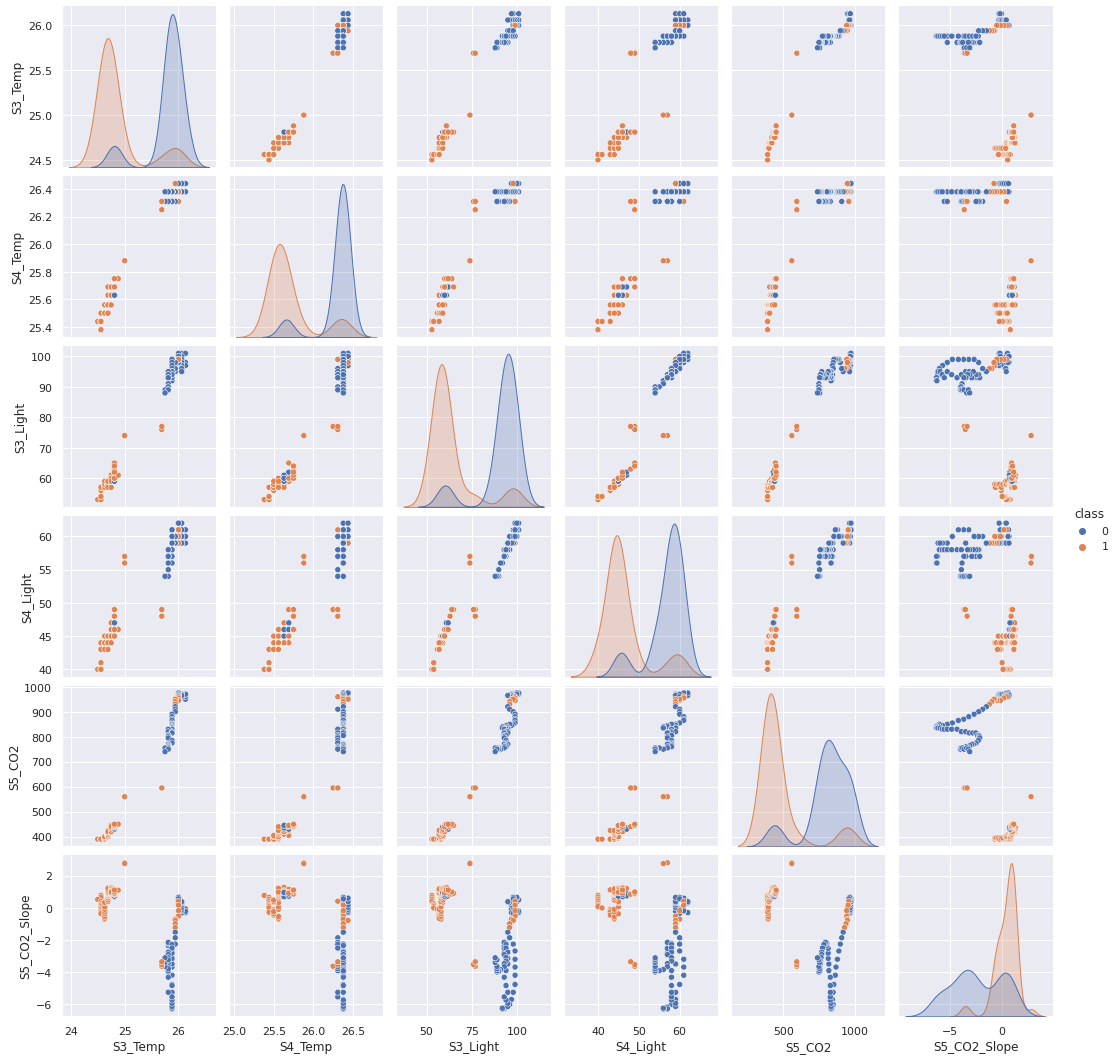

In [9]:
sns.pairplot(df, hue='class')
plt.show()

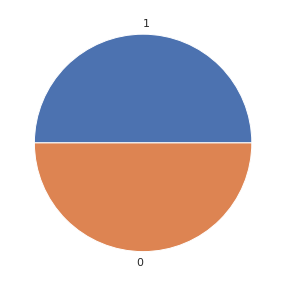

In [10]:
y =df['class']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

**Data Matrix**

In [11]:
X = df.drop(columns=['class'])
X.head(10)

S3_Temp  S4_Temp  S3_Light  S4_Light  S5_CO2  S5_CO2_Slope
0    24.56    25.38        53        40     390      0.769231
1    24.56    25.44        53        40     390      0.646154
2    24.50    25.44        53        40     390      0.519231
3    24.56    25.44        53        40     390      0.388462
4    24.56    25.44        54        40     390      0.253846
5    24.56    25.44        54        40     390      0.165385
6    24.56    25.44        54        40     390      0.076923
7    24.56    25.44        54        41     390     -0.011538
8    24.56    25.50        56        43     390     -0.100000
9    24.56    25.50        57        43     390     -0.188462

In [12]:
X.describe().transpose()

count        mean         std         min         25%  \
S3_Temp       158.0   25.328797    0.610263   24.500000   24.690000   
S4_Temp       158.0   25.997468    0.395927   25.380000   25.577500   
S3_Light      158.0   77.474684   18.403025   53.000000   59.000000   
S4_Light      158.0   51.664557    7.192185   40.000000   45.000000   
S5_CO2        158.0  646.139241  230.966468  390.000000  420.000000   
S5_CO2_Slope  158.0   -0.994961    2.279292   -6.296154   -2.889423   

                     50%         75%     max  
S3_Temp        25.720000   25.880000   26.13  
S4_Temp        26.310000   26.380000   26.44  
S3_Light       82.500000   95.000000  101.00  
S4_Light       54.000000   59.000000   62.00  
S5_CO2        667.500000  845.000000  975.00  
S5_CO2_Slope   -0.096154    0.839423    2.80

**Standardize the Data**

In [13]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

S3_Temp   S4_Temp  S3_Light  S4_Light    S5_CO2  S5_CO2_Slope
0 -1.263786 -1.564511 -1.334156 -1.626995 -1.112515      0.776470
1 -1.263786 -1.412486 -1.334156 -1.626995 -1.112515      0.722300
2 -1.362417 -1.412486 -1.334156 -1.626995 -1.112515      0.666438
3 -1.263786 -1.412486 -1.334156 -1.626995 -1.112515      0.608883
4 -1.263786 -1.412486 -1.279644 -1.626995 -1.112515      0.549635
5 -1.263786 -1.412486 -1.279644 -1.626995 -1.112515      0.510700
6 -1.263786 -1.412486 -1.279644 -1.626995 -1.112515      0.471766
7 -1.263786 -1.412486 -1.279644 -1.487513 -1.112515      0.432832
8 -1.263786 -1.260461 -1.170621 -1.208549 -1.112515      0.393897
9 -1.263786 -1.260461 -1.116109 -1.208549 -1.112515      0.354963

In [14]:
X.describe().transpose()

count          mean      std       min       25%       50%  \
S3_Temp       158.0 -1.079305e-15  1.00318 -1.362417 -1.050086  0.643078   
S4_Temp       158.0 -5.936180e-15  1.00318 -1.564511 -1.064095  0.791878   
S3_Light      158.0 -2.698264e-16  1.00318 -1.334156 -1.007086  0.273938   
S4_Light      158.0  2.698264e-16  1.00318 -1.626995 -0.929585  0.325752   
S5_CO2        158.0  1.798842e-16  1.00318 -1.112515 -0.982213  0.092778   
S5_CO2_Slope  158.0  0.000000e+00  1.00318 -2.333202 -0.833805  0.395590   

                   75%       max  
S3_Temp       0.906093  1.317055  
S4_Temp       0.969240  1.121265  
S3_Light      0.955334  1.282404  
S4_Light      1.023162  1.441607  
S5_CO2        0.863732  1.428374  
S5_CO2_Slope  0.807363  1.670268

**Observations and variables**

In [15]:
observations = list(df.index)
variables = list(df.columns)

**Box and Whisker Plots**

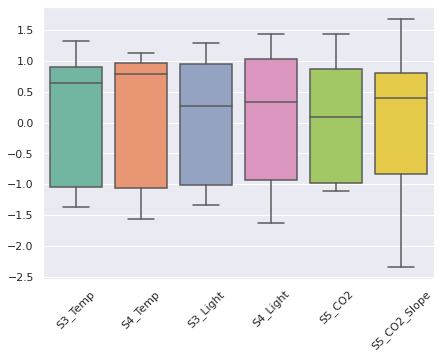

In [16]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

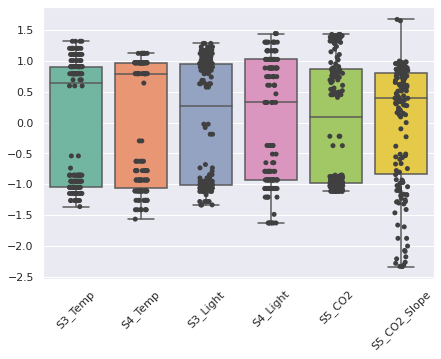

In [17]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

**Correlation Matrix**

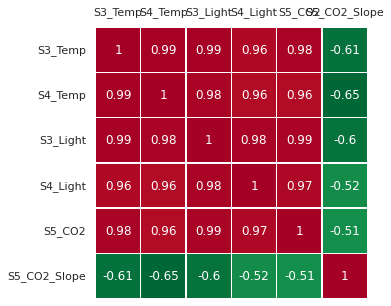

In [18]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

##**Principal Component Analysis (PCA)**

Text(0, 0.5, '$Z_2$')

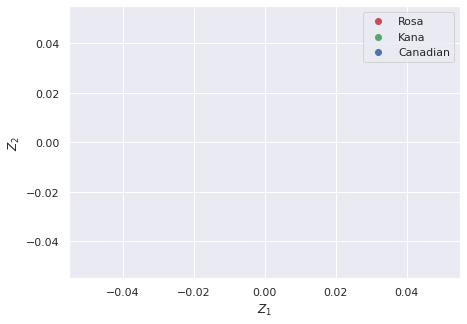

In [35]:
pca = PCA()
Z = pca.fit_transform(X)

# 1(Rosa)->0,  2(Kama)->1, 3(Canadian)->2
idx_Rosa = np.where(y == 0)
idx_Kana = np.where(y == 1)
idx_Canadian = np.where(y == 2)

plt. figure()
plt.scatter(Z[idx_Rosa,0], Z[idx_Rosa,1], c='r', label='Rosa')
plt.scatter(Z[idx_Kana,0], Z[idx_Kana,1], c='g', label='Kana')
plt.scatter(Z[idx_Canadian,0], Z[idx_Canadian,1], c='b', label='Canadian')
plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

**Eigenvectors**

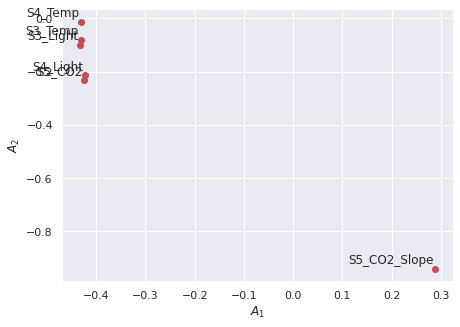

In [36]:
A = pca.components_.T 

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

/usr/local/lib/python3.8/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


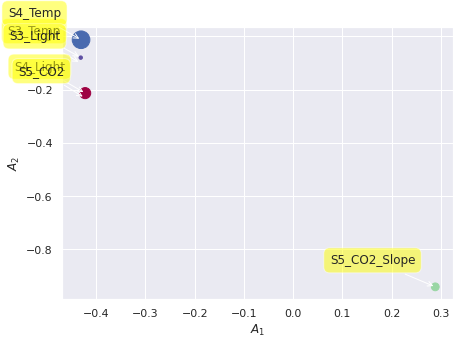

In [37]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree plot**

Text(0, 0.5, 'Explained variance')

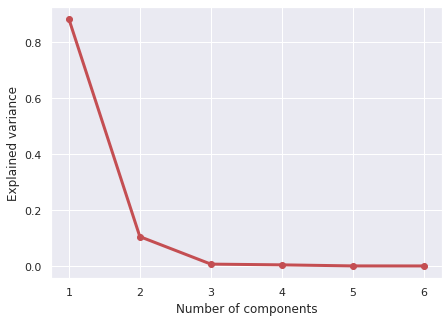

In [38]:
#Eigenvalues
Lambda = pca.explained_variance_ 

#Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 

**Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

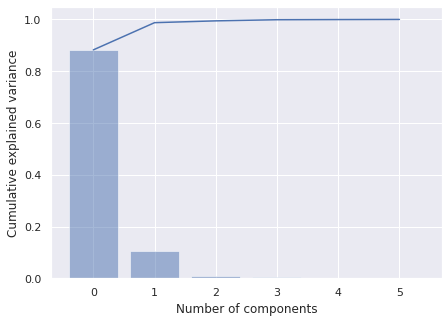

In [39]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Biplot**

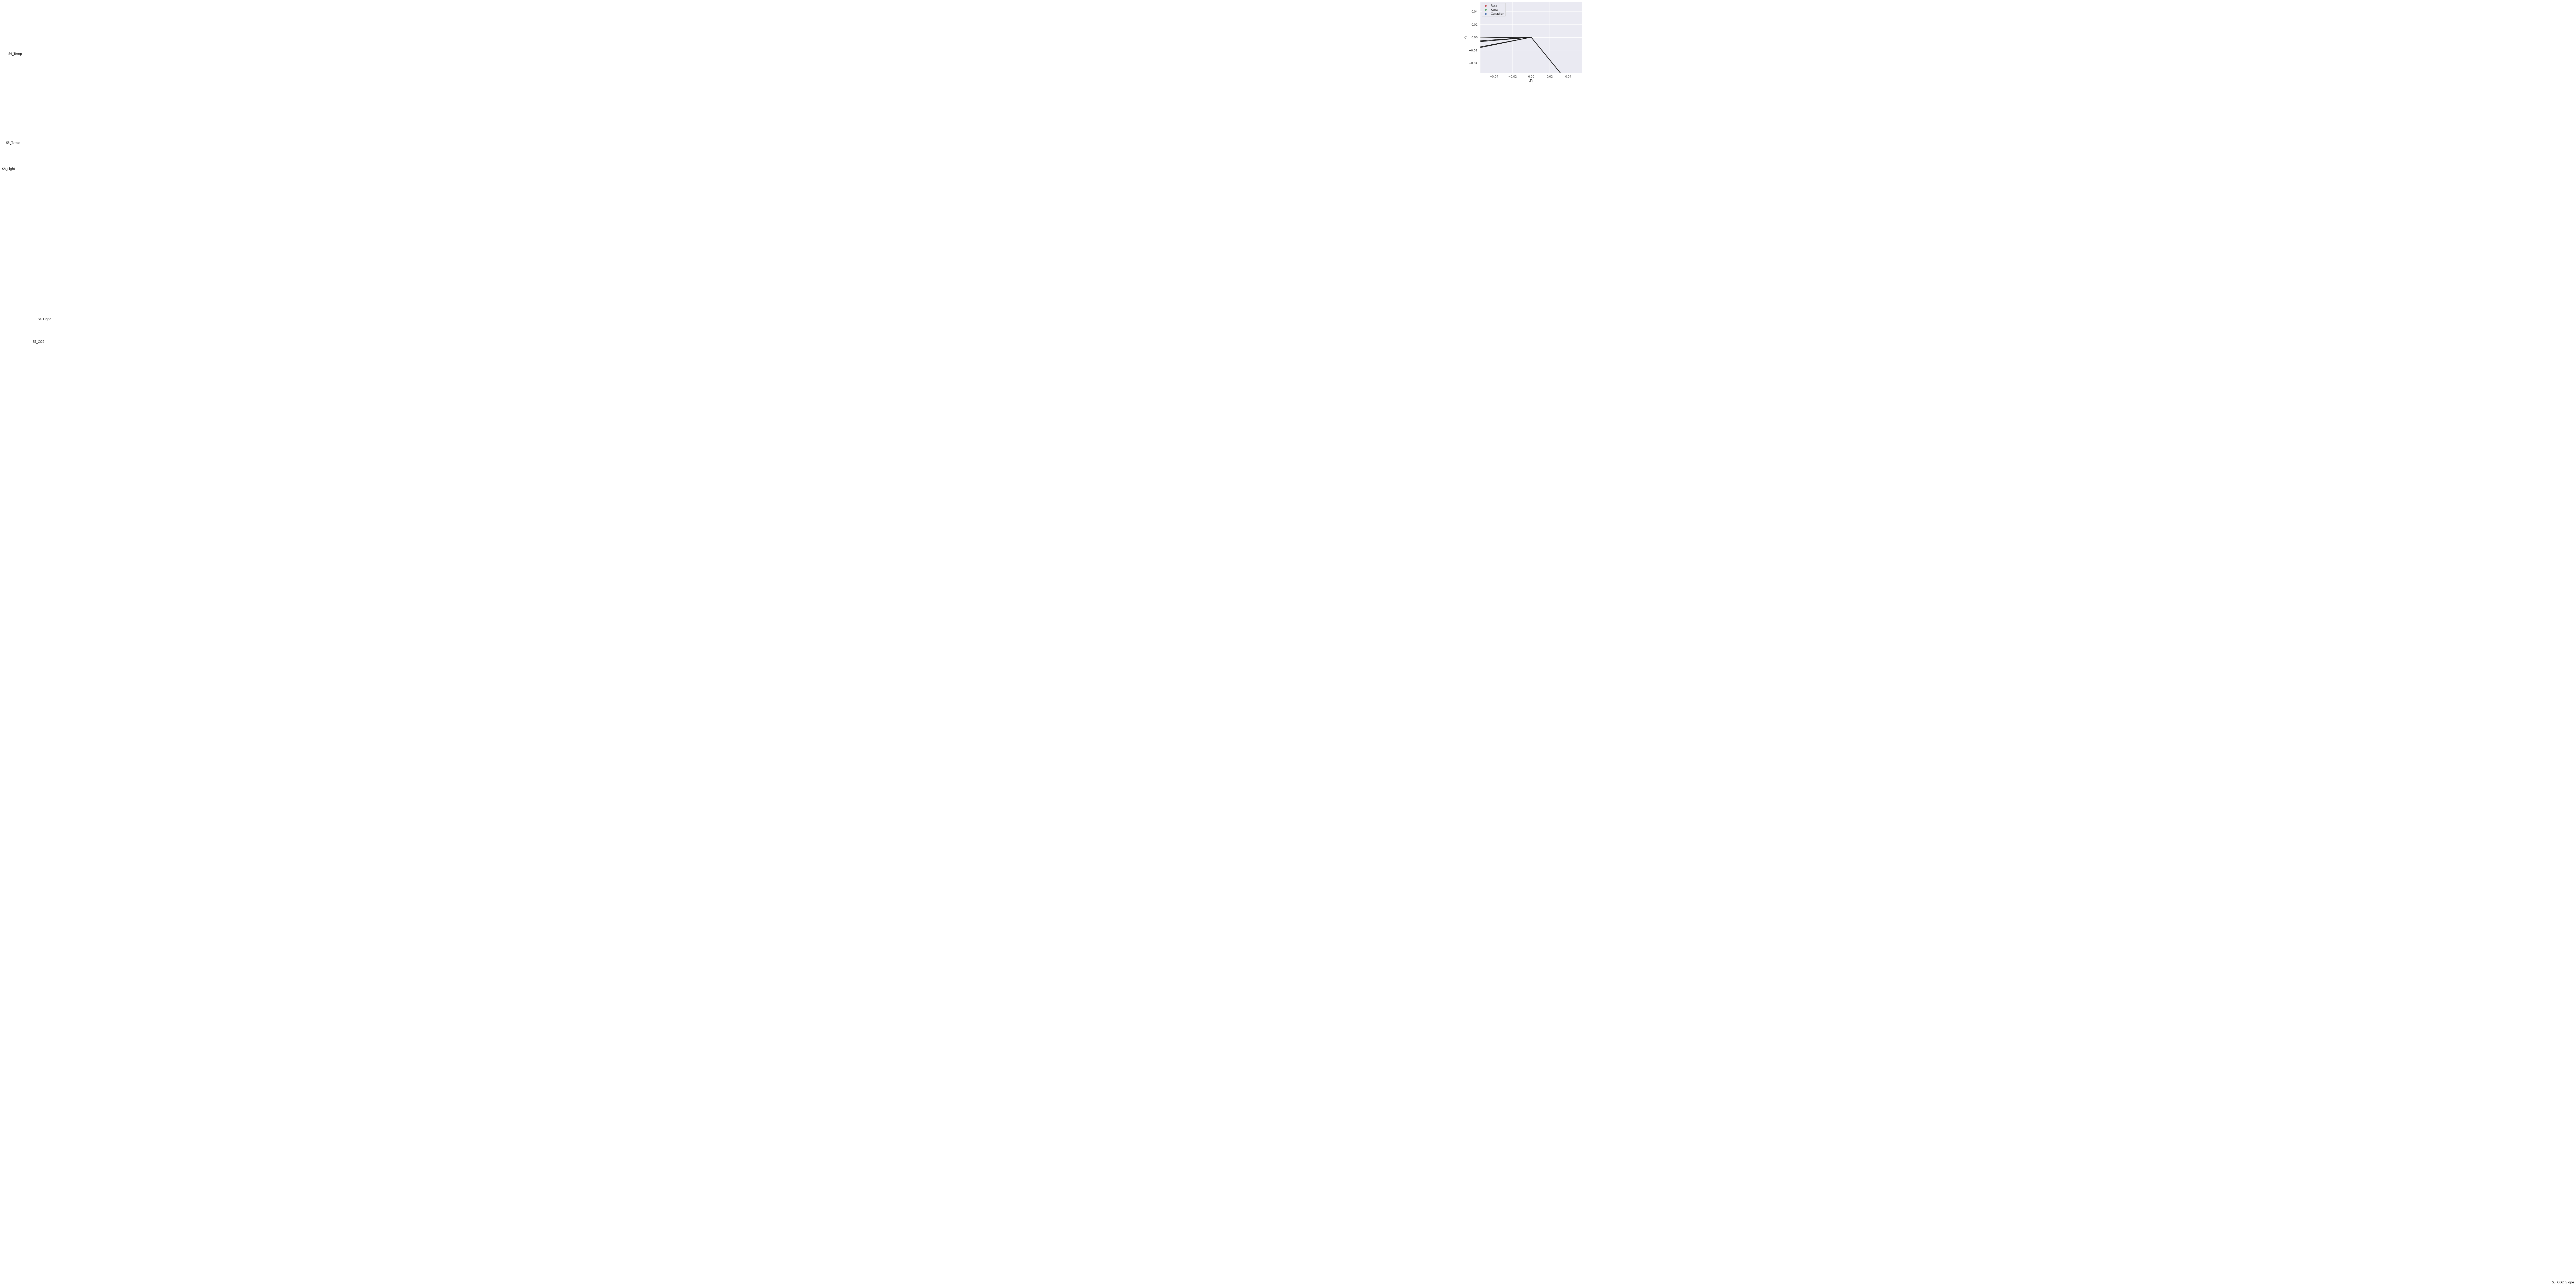

In [42]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt.figure()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_Rosa,0], Z[idx_Rosa,1], c='r', label='Rosa')
plt.scatter(Z[idx_Kana,0], Z[idx_Kana,1], c='g', label='Kana')
plt.scatter(Z[idx_Canadian,0], Z[idx_Canadian,1], c='b', label='Canadian')
plt.legend(loc='upper left')

##**Using PCA Library**

In [43]:
!pip install pca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [44]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [6] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [2] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [6] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


**Principal Components**

In [45]:
out['PC']

PC1       PC2
0    3.178873  0.129294
1    3.097757  0.178227
2    3.124179  0.238691
3    3.065017  0.284904
4    3.024339  0.335172
..        ...       ...
153 -1.643739  0.614355
154 -1.543570  0.586790
155 -0.604787  1.169689
156 -0.633009  1.128549
157 -0.576173  1.082822

[158 rows x 2 columns]

**Scatter plot**

[colourmap]> Warning: Colormap [Set1] can not create [158] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [158] unique colors! Available unique colors: [9].


(<Figure size 1440x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f3dc58dddf0>)

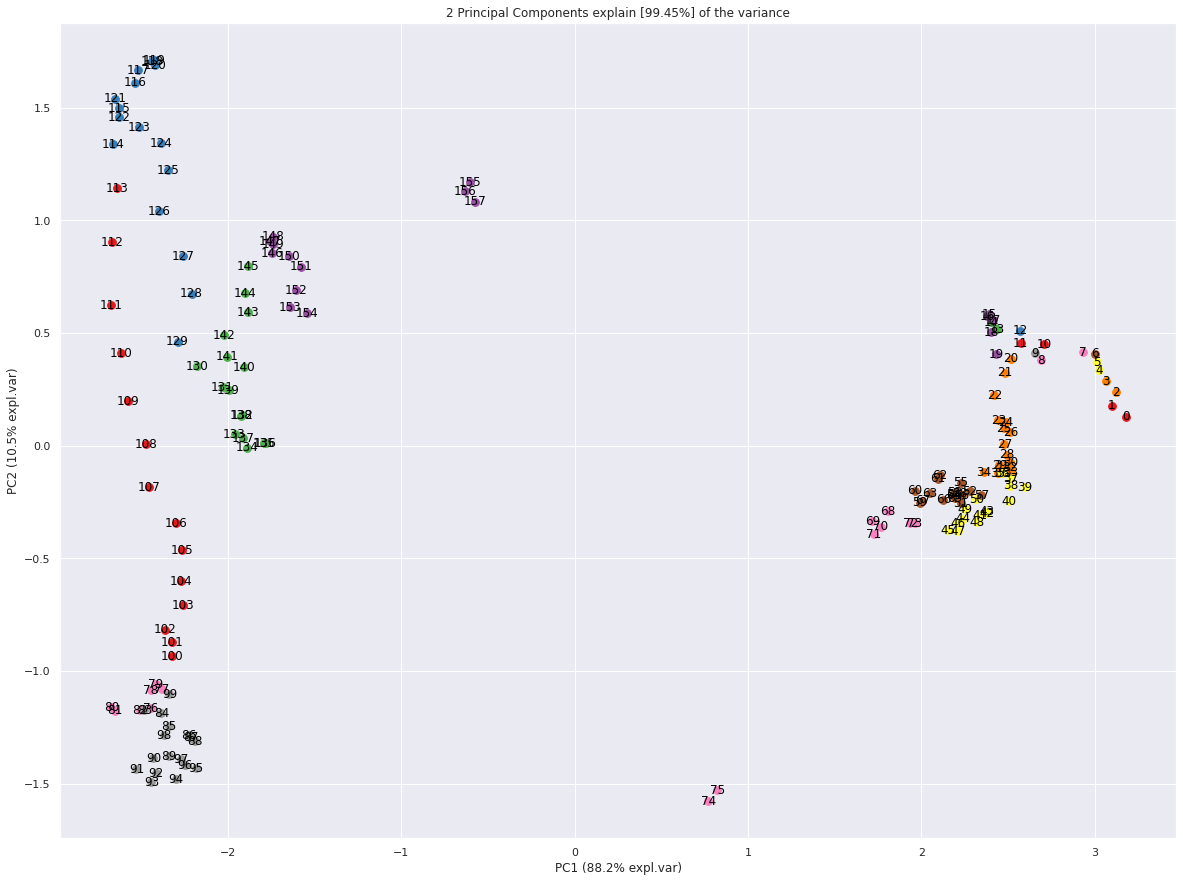

In [46]:
model.scatter(label=True, legend=False)

**Eigenvectors**

In [48]:
A = out['loadings'].T
A

PC1       PC2
S3_Temp      -0.431378 -0.080317
S4_Temp      -0.430714 -0.013273
S3_Light     -0.432485 -0.100152
S4_Light     -0.422359 -0.213568
S5_CO2       -0.423842 -0.230341
S5_CO2_Slope  0.288664 -0.940571

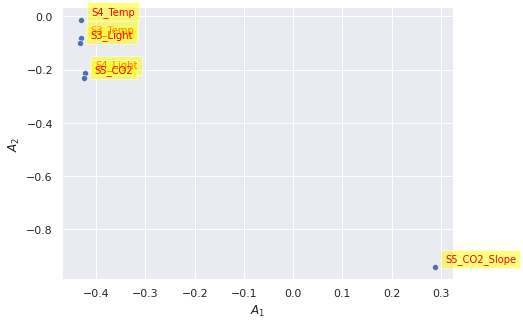

In [49]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

**Scree Plot**

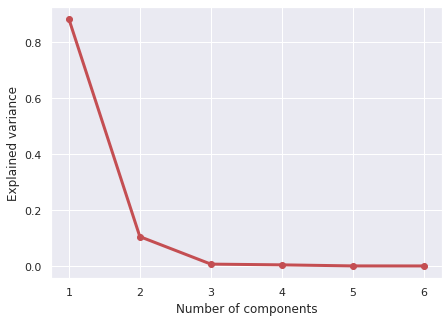

In [50]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

**Explained Variance Plot**

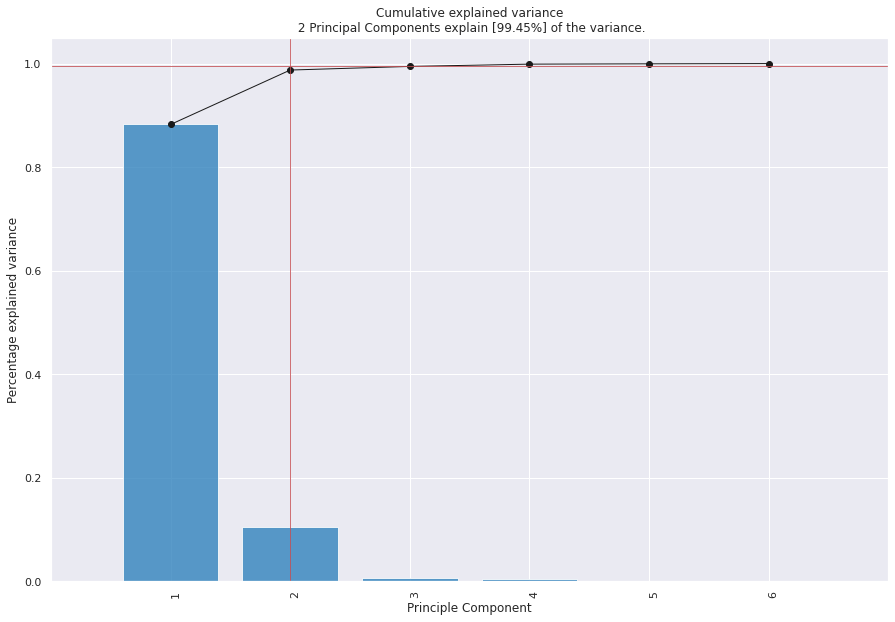

<Figure size 504x360 with 0 Axes>

In [51]:
model.plot();

**Biplot**

[pca] >Plot PC1 vs PC2 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [158] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [158] unique colors! Available unique colors: [9].


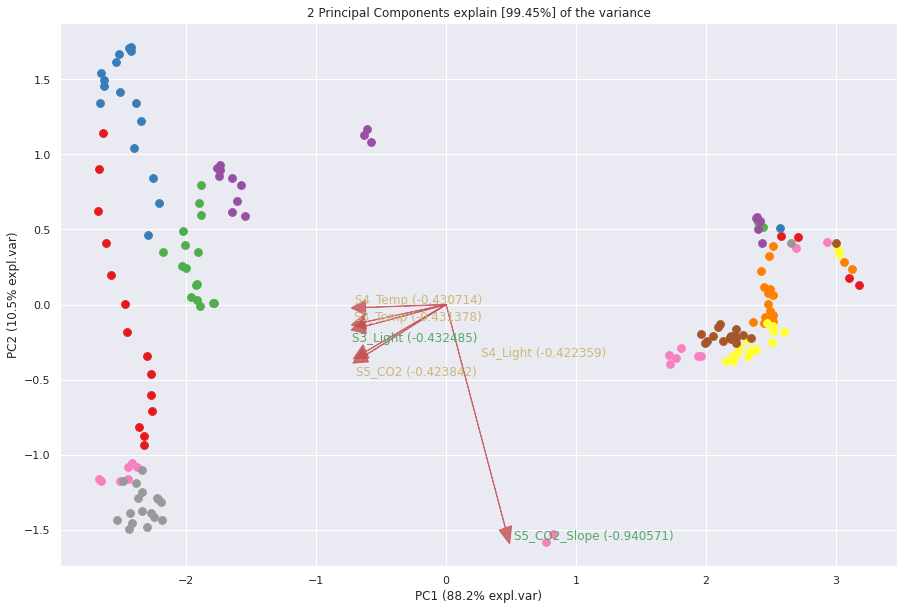

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f3dc2868550>)

In [52]:
model.biplot(label=False, legend=False)

In [54]:
model.biplot3d(legend=False)

[pca] >Requires 3 PCs to make 3d plot. Try to use biplot() instead.


(None, None)

#**Classification**

**Using PyCaret**

PyCaret uses interactive plotting ability. In order to render interactive plots in Google Colab, run the below line of code in your colab notebook.

In [55]:
#For Google Colab only
from pycaret.utils import enable_colab 
enable_colab()

Colab mode enabled.


In order to demonstrate the predict_model() function on unseen data, a sample of 21 observations has been withheld from the original dataset to be used for predictions. This should not be confused with a train/test split as this particular split is performed to simulate a real life scenario. Another way to think about this is that these 21 records were not available at the time when the machine learning experiment was performed.

In [56]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (142, 7)
Unseen Data For Predictions: (16, 7)


**Setting up the Environment in PyCaret**

The setup() function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. setup() must be called before executing any other function in pycaret. It takes two mandatory parameters: a pandas dataframe and the name of the target column. All other parameters are optional and are used to customize the pre-processing pipeline (we will see them in later tutorials).

When setup() is executed, PyCaret's inference algorithm will automatically infer the data types for all features based on certain properties. The data type should be inferred correctly but this is not always the case. To account for this, PyCaret displays a table containing the features and their inferred data types after setup() is executed. If all of the data types are correctly identified enter can be pressed to continue or quit can be typed to end the expriment. Ensuring that the data types are correct is of fundamental importance in PyCaret as it automatically performs a few pre-processing tasks which are imperative to any machine learning experiment. These tasks are performed differently for each data type which means it is very important for them to be correctly configured.

In [57]:
from pycaret.classification import *
clf = setup(data=data, target='class', train_size=0.7, session_id=123)

Description             Value
0                               session_id               123
1                                   Target             class
2                              Target Type            Binary
3                            Label Encoded              None
4                            Original Data          (142, 7)
5                           Missing Values             False
6                         Numeric Features                 5
7                     Categorical Features                 1
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set          (99, 21)
12                    Transformed Test Set          (43, 21)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              0975
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize             False
30                        Normalize Method              None
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA             False
34                              PCA Method              None
35                          PCA Components              None
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='class',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strate...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

Once the setup has been succesfully executed it prints the information grid which contains several important pieces of information. Most of the information is related to the pre-processing pipeline which is constructed when setup() is executed. The majority of these features are out of scope for the purposes of this tutorial however a few important things to note at this stage include:

* **session_id** : A pseduo-random number distributed as a seed in all functions for later reproducibility. If no session_id is passed, a random number is automatically generated that is distributed to all functions. In this experiment, the session_id is set as 123 for later reproducibility.

* **Target Type** : Binary or Multiclass. The Target type is automatically detected and shown. There is no difference in how the experiment is performed for Binary or Multiclass problems. All functionalities are identical.

* **Label Encoded** : When the Target variable is of type string (i.e. 'Yes' or 'No') instead of 1 or 0, it automatically encodes the label into 1 and 0 and displays the mapping (0 : No, 1 : Yes) for reference. 

* **Original Data** : Displays the original shape of the dataset. In this experiment (189, 8) means 189 samples and 8 features including the class column.

* **Missing Values** : When there are missing values in the original data this will show as True. For this experiment there are no missing values in the dataset.

* **Numeric Features** : The number of features inferred as numeric. In this dataset, 7 out of 8 features are inferred as numeric.

* **Categorical Features** : The number of features inferred as categorical. In this dataset, there are no categorical features.

* **Transformed Train Set** : Displays the shape of the transformed training set. Notice that the original shape of (189, 8) is transformed into (132, 7) for the transformed train set.

* **Transformed Test Set** : Displays the shape of the transformed test/hold-out set. There are 57 samples in test/hold-out set. This split is based on the default value of 70/30 that can be changed using the train_size parameter in setup.

Notice how a few tasks that are imperative to perform modeling are automatically handled such as missing value imputation, categorical encoding etc. Most of the parameters in setup() are optional and used for customizing the pre-processing pipeline. 

**Comparing All Models**

In [58]:
 #show the best model and their statistics
 best_model = compare_models() 

Model  Accuracy     AUC  Recall   Prec.  \
rf               Random Forest Classifier    0.9300  0.9920  0.9433  0.9314   
ada                  Ada Boost Classifier    0.9300  0.9854  0.9467  0.9381   
dt               Decision Tree Classifier    0.9200  0.9183  0.9267  0.9381   
ridge                    Ridge Classifier    0.9200  0.0000  0.9233  0.9314   
lightgbm  Light Gradient Boosting Machine    0.9200  0.9838  0.9433  0.9264   
lr                    Logistic Regression    0.9100  0.9673  0.9033  0.9314   
gbc          Gradient Boosting Classifier    0.9100  0.9835  0.9267  0.9205   
et                 Extra Trees Classifier    0.9100  0.9797  0.9067  0.9314   
knn                K Neighbors Classifier    0.9000  0.9674  0.9067  0.9148   
nb                            Naive Bayes    0.9000  0.9062  0.8867  0.9264   
lda          Linear Discriminant Analysis    0.8900  0.9555  0.8633  0.9264   
svm                   SVM - Linear Kernel    0.7600  0.0000  0.6633  0.6114   
qda       Quadratic Discriminant Analysis    0.5456  0.0000  1.0000  0.5456   
dummy                    Dummy Classifier    0.5456  0.5000  1.0000  0.5456   

              F1   Kappa     MCC  TT (Sec)  
rf        0.9355  0.8565  0.8620     0.181  
ada       0.9353  0.8581  0.8720     0.092  
dt        0.9242  0.8381  0.8536     0.010  
ridge     0.9244  0.8365  0.8437     0.014  
lightgbm  0.9301  0.8311  0.8449     0.098  
lr        0.9133  0.8165  0.8253     0.278  
gbc       0.9167  0.8163  0.8305     0.061  
et        0.9153  0.8165  0.8253     0.129  
knn       0.9077  0.7949  0.8020     0.014  
nb        0.9002  0.7981  0.8095     0.011  
lda       0.8889  0.7765  0.7878     0.010  
svm       0.6305  0.4965  0.5020     0.010  
qda       0.7048  0.0000  0.0000     0.012  
dummy     0.7048  0.0000  0.0000     0.008

INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


In [59]:
best_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

**Create a Model**

create_model is the most granular function in PyCaret and is often the foundation behind most of the PyCaret functionalities. As the name suggests this function trains and evaluates a model using cross validation that can be set with fold parameter. The output prints a score grid that shows Accuracy, Recall, Precision, F1, Kappa and MCC by fold.

For the remaining part of this tutorial, we will work with the below models as our candidate models. The selections are for illustration purposes only and do not necessarily mean they are the top performing or ideal for this type of data.

* Decision Tree Classifier ('dt')
* K Neighbors Classifier ('knn')
* Logistic Regression ('lr')

There are many classifiers available in the model library of PyCaret. Please view the create_model() docstring for the list of all available models.

**Create Decision Tree Classifier**

In [60]:
dt = create_model('dt')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0         0.90  0.8750  1.0000  0.8571  0.9231  0.7826  0.8018
1         1.00  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
2         0.80  0.8333  0.6667  1.0000  0.8000  0.6154  0.6667
3         0.90  0.8750  1.0000  0.8571  0.9231  0.7826  0.8018
4         0.90  0.9000  0.8000  1.0000  0.8889  0.8000  0.8165
5         0.90  0.9000  0.8000  1.0000  0.8889  0.8000  0.8165
6         0.90  0.9000  1.0000  0.8333  0.9091  0.8000  0.8165
7         1.00  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
8         0.90  0.9000  1.0000  0.8333  0.9091  0.8000  0.8165
9         1.00  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean      0.92  0.9183  0.9267  0.9381  0.9242  0.8381  0.8536
SD        0.06  0.0569  0.1172  0.0762  0.0597  0.1184  0.1049

INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:create_model() succesfully completed......................................


In [61]:
#trained model object is stored in the variable 'dt'. 
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

**Tune a Model:** How to automatically tune the hyper-parameters of a multiclass model. When a model is created using the create_model() function it uses the default hyperparameters. In order to tune hyperparameters, the tune_model() function is used. The tune_model() function is a random grid search of hyperparameters over a pre-defined search space. By default, it is set to optimize Accuracy but this can be changed using optimize parameter. This function automatically tunes the hyperparameters of a model on a pre-defined search space and scores it using stratified cross validation. The output prints a score grid that shows Accuracy, AUC, Recall, Precision, F1 and Kappa by fold.

**Tune Decision Tree Model**

In [62]:
tuned_dt = tune_model(dt)

Accuracy     AUC  Recall  Prec.      F1   Kappa     MCC
0       1.0000  1.0000  1.0000    1.0  1.0000  1.0000  1.0000
1       1.0000  1.0000  1.0000    1.0  1.0000  1.0000  1.0000
2       0.9000  0.9167  0.8333    1.0  0.9091  0.8000  0.8165
3       1.0000  1.0000  1.0000    1.0  1.0000  1.0000  1.0000
4       0.9000  0.8800  0.8000    1.0  0.8889  0.8000  0.8165
5       1.0000  1.0000  1.0000    1.0  1.0000  1.0000  1.0000
6       1.0000  1.0000  1.0000    1.0  1.0000  1.0000  1.0000
7       1.0000  1.0000  1.0000    1.0  1.0000  1.0000  1.0000
8       0.9000  1.0000  0.8000    1.0  0.8889  0.8000  0.8165
9       1.0000  1.0000  1.0000    1.0  1.0000  1.0000  1.0000
Mean    0.9700  0.9797  0.9433    1.0  0.9687  0.9400  0.9449
SD      0.0458  0.0415  0.0870    0.0  0.0481  0.0917  0.0841

INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=14, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:tune_model() succesfully completed......................................


In [63]:
#tuned model object is stored in the variable 'tuned_dt'. 
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=14, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

**Evaluate Decision Tree Model**

Update statmodels

In [64]:
!pip install statsmodels --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


How to analyze model performance using various plots

In [ ]:
evaluate_model(tuned_dt)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create K Neighbors Model**

In [67]:
knn = create_model('knn')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9000  0.9792  1.0000  0.8571  0.9231  0.7826  0.8018
1       0.9000  0.9375  1.0000  0.8571  0.9231  0.7826  0.8018
2       0.9000  0.9792  0.8333  1.0000  0.9091  0.8000  0.8165
3       0.8000  0.9583  0.8333  0.8333  0.8333  0.5833  0.5833
4       0.8000  0.9600  0.8000  0.8000  0.8000  0.6000  0.6000
5       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
6       0.9000  0.9800  0.8000  1.0000  0.8889  0.8000  0.8165
7       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
8       0.8000  0.8800  0.8000  0.8000  0.8000  0.6000  0.6000
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9000  0.9674  0.9067  0.9148  0.9077  0.7949  0.8020
SD      0.0775  0.0351  0.0940  0.0871  0.0742  0.1573  0.1573

INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
INFO:logs:create_model() succesfully completed......................................


**Tune K Neighbors Model**

In [68]:
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9000  0.9583  1.0000  0.8571  0.9231  0.7826  0.8018
1       0.9000  0.9375  1.0000  0.8571  0.9231  0.7826  0.8018
2       0.9000  0.8958  0.8333  1.0000  0.9091  0.8000  0.8165
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       0.8000  0.8400  0.8000  0.8000  0.8000  0.6000  0.6000
5       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
6       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
7       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
8       0.8000  0.7800  0.8000  0.8000  0.8000  0.6000  0.6000
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9300  0.9412  0.9433  0.9314  0.9355  0.8565  0.8620
SD      0.0781  0.0748  0.0870  0.0859  0.0765  0.1577  0.1555

INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 6
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=33, p=2,
                     weights='uniform')
INFO:logs:tune_model() succesfully completed......................................


**Evaluate K Neighbors Model**

In [69]:
evaluate_model(tuned_knn)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=33, p=2,
                     weights='uniform'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create Logistic Regression Model**

In [70]:
lr = create_model('lr')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0         0.90  0.9167  1.0000  0.8571  0.9231  0.7826  0.8018
1         0.90  1.0000  1.0000  0.8571  0.9231  0.7826  0.8018
2         0.90  0.9167  0.8333  1.0000  0.9091  0.8000  0.8165
3         1.00  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4         0.80  0.9600  0.8000  0.8000  0.8000  0.6000  0.6000
5         0.90  0.9600  0.8000  1.0000  0.8889  0.8000  0.8165
6         0.90  1.0000  0.8000  1.0000  0.8889  0.8000  0.8165
7         1.00  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
8         0.80  0.9200  0.8000  0.8000  0.8000  0.6000  0.6000
9         1.00  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean      0.91  0.9673  0.9033  0.9314  0.9133  0.8165  0.8253
SD        0.07  0.0358  0.0971  0.0859  0.0704  0.1407  0.1394

INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 7
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:create_model() succesfully completed......................................


**Tune Logistic Regression Model**

In [71]:
tuned_lr = tune_model(lr)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9000  0.7917  1.0000  0.8571  0.9231  0.7826  0.8018
1       0.9000  1.0000  1.0000  0.8571  0.9231  0.7826  0.8018
2       0.9000  0.9583  0.8333  1.0000  0.9091  0.8000  0.8165
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       0.8000  0.9600  0.8000  0.8000  0.8000  0.6000  0.6000
5       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
6       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
7       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
8       0.8000  0.9200  0.8000  0.8000  0.8000  0.6000  0.6000
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9300  0.9630  0.9433  0.9314  0.9355  0.8565  0.8620
SD      0.0781  0.0628  0.0870  0.0859  0.0765  0.1577  0.1555

INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 8
INFO:logs:LogisticRegression(C=7.863, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


**Evaluate Logistic Regression Model**

In [72]:
evaluate_model(tuned_lr)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LogisticRegression(C=7.863, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create Random Forest Model**

In [73]:
rf = create_model('rf')

Accuracy    AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9000  1.000  1.0000  0.8571  0.9231  0.7826  0.8018
1       0.9000  1.000  1.0000  0.8571  0.9231  0.7826  0.8018
2       0.9000  1.000  0.8333  1.0000  0.9091  0.8000  0.8165
3       1.0000  1.000  1.0000  1.0000  1.0000  1.0000  1.0000
4       0.8000  0.960  0.8000  0.8000  0.8000  0.6000  0.6000
5       1.0000  1.000  1.0000  1.0000  1.0000  1.0000  1.0000
6       1.0000  1.000  1.0000  1.0000  1.0000  1.0000  1.0000
7       1.0000  1.000  1.0000  1.0000  1.0000  1.0000  1.0000
8       0.8000  0.960  0.8000  0.8000  0.8000  0.6000  0.6000
9       1.0000  1.000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9300  0.992  0.9433  0.9314  0.9355  0.8565  0.8620
SD      0.0781  0.016  0.0870  0.0859  0.0765  0.1577  0.1555

INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 9
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


**Tune Random Forest Model**

In [74]:
tuned_rf = tune_model(rf)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9000  0.9583  1.0000  0.8571  0.9231  0.7826  0.8018
1       0.9000  1.0000  1.0000  0.8571  0.9231  0.7826  0.8018
2       0.9000  1.0000  0.8333  1.0000  0.9091  0.8000  0.8165
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       0.8000  0.9600  0.8000  0.8000  0.8000  0.6000  0.6000
5       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
6       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
7       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
8       0.8000  0.9600  0.8000  0.8000  0.8000  0.6000  0.6000
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9300  0.9878  0.9433  0.9314  0.9355  0.8565  0.8620
SD      0.0781  0.0186  0.0870  0.0859  0.0765  0.1577  0.1555

INFO:logs:create_model_container: 22
INFO:logs:master_model_container: 22
INFO:logs:display_container: 10
INFO:logs:RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


**Evaluate Random Forest Model**

In [75]:
evaluate_model(tuned_rf)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#**Tune the Best Model**

In [79]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model = tune_model(best_model)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9000  0.9583  1.0000  0.8571  0.9231  0.7826  0.8018
1       0.9000  1.0000  1.0000  0.8571  0.9231  0.7826  0.8018
2       0.9000  1.0000  0.8333  1.0000  0.9091  0.8000  0.8165
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       0.8000  0.9600  0.8000  0.8000  0.8000  0.6000  0.6000
5       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
6       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
7       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
8       0.8000  0.9600  0.8000  0.8000  0.8000  0.6000  0.6000
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9300  0.9878  0.9433  0.9314  0.9355  0.8565  0.8620
SD      0.0781  0.0186  0.0870  0.0859  0.0765  0.1577  0.1555

INFO:logs:create_model_container: 24
INFO:logs:master_model_container: 24
INFO:logs:display_container: 12
INFO:logs:RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [83]:
tuned_best_model

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [84]:
evaluate_model(tuned_best_model)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#**Classification + PCA**

In [85]:
clf_pca = setup(data=data, target='class', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

Description             Value
0                               session_id               123
1                                   Target             class
2                              Target Type            Binary
3                            Label Encoded              None
4                            Original Data          (142, 7)
5                           Missing Values             False
6                         Numeric Features                 5
7                     Categorical Features                 1
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set           (99, 3)
12                    Transformed Test Set           (43, 3)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              3b75
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize              True
30                        Normalize Method            zscore
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA              True
34                              PCA Method            linear
35                          PCA Components                 3
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='class',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strate...
                ('dummy', Dummify(target='class')),
                ('fix_perfect', Remove_100(target='class')),
                ('clean_names', Clean_Colum_Names()),
       

In [86]:
#show the best model and their statistics
best_model_pca = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
et                 Extra Trees Classifier    0.9500  0.9920  0.9633  0.9548   
lightgbm  Light Gradient Boosting Machine    0.9500  0.9898  0.9633  0.9524   
dt               Decision Tree Classifier    0.9400  0.9433  0.9267  0.9600   
rf               Random Forest Classifier    0.9400  0.9878  0.9433  0.9514   
ada                  Ada Boost Classifier    0.9400  0.9677  0.9267  0.9667   
gbc          Gradient Boosting Classifier    0.9400  0.9699  0.9267  0.9633   
lr                    Logistic Regression    0.9100  0.9473  0.9033  0.9314   
nb                            Naive Bayes    0.9100  0.9435  0.9033  0.9314   
ridge                    Ridge Classifier    0.9100  0.0000  0.9033  0.9314   
lda          Linear Discriminant Analysis    0.9100  0.9553  0.9033  0.9314   
knn                K Neighbors Classifier    0.9000  0.9595  0.8867  0.9314   
qda       Quadratic Discriminant Analysis    0.9000  0.9377  0.8867  0.9314   
svm                   SVM - Linear Kernel    0.8244  0.0000  0.8033  0.7886   
dummy                    Dummy Classifier    0.5456  0.5000  1.0000  0.5456   

              F1   Kappa     MCC  TT (Sec)  
et        0.9553  0.8965  0.9053     0.135  
lightgbm  0.9554  0.8966  0.9018     0.100  
dt        0.9418  0.8800  0.8833     0.011  
rf        0.9444  0.8765  0.8837     0.161  
ada       0.9444  0.8767  0.8800     0.100  
gbc       0.9416  0.8800  0.8866     0.050  
lr        0.9133  0.8165  0.8253     0.243  
nb        0.9133  0.8165  0.8253     0.009  
ridge     0.9133  0.8165  0.8253     0.009  
lda       0.9133  0.8165  0.8253     0.010  
knn       0.9042  0.7965  0.8070     0.013  
qda       0.9024  0.7981  0.8103     0.009  
svm       0.7911  0.6565  0.6655     0.009  
dummy     0.7048  0.0000  0.0000     0.008

INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


In [87]:
best_model_pca

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

**Tune the Best Model**

In [88]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9000  0.9792  1.0000  0.8571  0.9231  0.7826  0.8018
1       0.9000  1.0000  1.0000  0.8571  0.9231  0.7826  0.8018
2       0.9000  0.9167  0.8333  1.0000  0.9091  0.8000  0.8165
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       0.8000  0.8000  0.8000  0.8000  0.8000  0.6000  0.6000
5       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
6       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
7       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
8       0.8000  0.8200  0.8000  0.8000  0.8000  0.6000  0.6000
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9300  0.9516  0.9433  0.9314  0.9355  0.8565  0.8620
SD      0.0781  0.0751  0.0870  0.0859  0.0765  0.1577  0.1555

INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:ExtraTreesClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={},
                     criterion='gini', max_depth=7, max_features='log2',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.3, min_impurity_split=None,
                     min_samples_leaf=4, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=140, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [89]:
tuned_best_model_pca

ExtraTreesClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={},
                     criterion='gini', max_depth=7, max_features='log2',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.3, min_impurity_split=None,
                     min_samples_leaf=4, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=140, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [90]:
evaluate_model(tuned_best_model_pca)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=ExtraTreesClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={},
                     criterion='gini', max_depth=7, max_features='log2',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.3, min_impurity_split=None,
                     min_samples_leaf=4, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=140, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Note:** The AUC metric is not available for Multiclass classification however the column will still be shown with zero values to maintain consistency between the Binary Classification and Multiclass Classification display grids.

#**Explainable AI with Shapley values**

Shapley values are a widely used approach from cooperative game theory that come with desirable properties.

In [111]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [112]:
print("Numpy version: ", np.__version__)

Numpy version:  1.19.5


In [113]:
!pip install numba==0.53

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [114]:
import shap

In [115]:
rf_pca = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9000  1.0000  1.0000  0.8571  0.9231  0.7826  0.8018
1       0.9000  1.0000  1.0000  0.8571  0.9231  0.7826  0.8018
2       0.9000  0.9583  0.8333  1.0000  0.9091  0.8000  0.8165
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       0.9000  0.9600  0.8000  1.0000  0.8889  0.8000  0.8165
5       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
6       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
7       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
8       0.8000  0.9600  0.8000  0.8000  0.8000  0.6000  0.6000
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9400  0.9878  0.9433  0.9514  0.9444  0.8765  0.8837
SD      0.0663  0.0186  0.0870  0.0756  0.0645  0.1349  0.1306

INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 8
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [116]:
tuned_rf_pca = tune_model(rf_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
1       0.9000  1.0000  1.0000  0.8571  0.9231  0.7826  0.8018
2       0.9000  0.9792  0.8333  1.0000  0.9091  0.8000  0.8165
3       0.9000  1.0000  0.8333  1.0000  0.9091  0.8000  0.8165
4       0.9000  0.8800  0.8000  1.0000  0.8889  0.8000  0.8165
5       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
6       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
7       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
8       0.8000  0.9600  0.8000  0.8000  0.8000  0.6000  0.6000
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9400  0.9819  0.9267  0.9657  0.9430  0.8783  0.8851
SD      0.0663  0.0363  0.0904  0.0698  0.0651  0.1338  0.1298

INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 9
INFO:logs:RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


**SHAP Summary Plot**

Rather than using a typical feature importance bar chart, we use a density scatter plot of SHAP values for each feature to identify how much impact each feature has on the model output for individuals in the validation dataset. Features are sorted by the sum of the SHAP value magnitudes across all samples. 

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=summary, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: summary
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


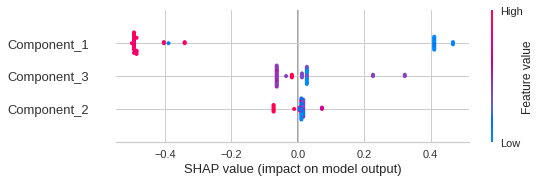

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [117]:
interpret_model(tuned_rf_pca, plot='summary')

In [118]:
#explainer = shap.TreeExplainer(tuned_rf_pca)
#X = df.drop('class', axis=1)
#shap_values = explainer.shap_values(X)
#shap.summary_plot(shap_values, X)

**Visualize a single prediction**

In [119]:
interpret_model(tuned_rf_pca, plot='reason', observation=32)

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=32, plot=reason, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: reason
INFO:logs:model type detected: type 1
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values
INFO:logs:model type detected: Unknown


INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


From the above the plot, we can seethe "base value," which is defined as the mean predicted target; and f(x), which is the prediction for a selected observation (i.e. observation number 32). The red-colored features increased the predicted value, while the blue-colored features decreased it. The size of each feature (i.e. Principal Component) indicates the impact it has on the model.

**Visualize many predictions**

In [120]:
interpret_model(tuned_rf_pca, plot='reason')

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=reason, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: reason
INFO:logs:model type detected: type 1
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................
